## Importing the Library

In [46]:
import numpy as np
import pandas as pd

### loading the dataset

In [47]:
df = pd.read_csv("Complete_Blasting_info (1).csv")

In [48]:
df.head()

,Unnamed: 0,PM10 (µg/m3),Time,Date,NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
0,0,95.0,00:00:00,2023-02-01,14.484070,35.0,90.1,56.2,0.31,11.986833,17.7,28.1,0.4
1,1,95.0,00:15:00,2023-02-01,14.484070,35.0,88.0,55.1,0.33,11.986833,18.3,27.1,0.4
2,2,95.0,00:30:00,2023-02-01,15.835914,35.0,87.7,55.2,0.38,10.912796,19.7,24.9,0.4
3,3,122.0,00:45:00,2023-02-01,15.914518,34.0,88.9,55.7,0.38,10.613291,21.3,21.9,0.4
4,4,122.0,01:00:00,2023-02-01,16.035640,34.0,90.0,55.8,0.38,7.362361,22.3,16.7,0.4


In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       8640 non-null   int64  
 1   PM10 (µg/m3)     8640 non-null   float64
 2   Time             8640 non-null   object 
 3   Date             8640 non-null   object 
 4   NO (µg/m3)       8640 non-null   float64
 5   PM2.5 (µg/m3)    8640 non-null   float64
 6   NO2 (µg/m3)      8640 non-null   float64
 7   NOX (ppb)        8640 non-null   float64
 8   CO (mg/m3)       8640 non-null   float64
 9   SO2 (µg/m3)      8640 non-null   float64
 10  NH3 (µg/m3)      8640 non-null   float64
 11  Ozone (µg/m3)    8640 non-null   float64
 12  Benzene (µg/m3)  8640 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 877.6+ KB
None


In [50]:
df['Date'] = pd.to_datetime(df['Date'])

In [51]:
blasting_hours_data = df[(df['Time'] >= '13:45:00') & (df['Time'] <= '14:45:00')]
readings_count = blasting_hours_data.shape[0]
print(f"Number of readings during blasting hours: {readings_count}")

Number of readings during blasting hours: 450


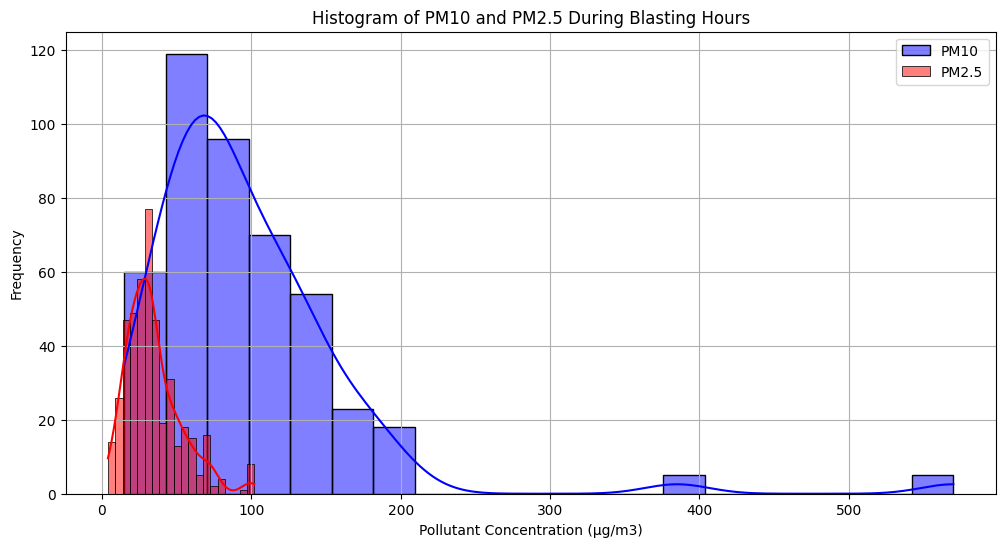

In [52]:
import seaborn as sns
plt.figure(figsize=(12, 6))

sns.histplot(blasting_hours_data['PM10 (µg/m3)'], bins=20, color='blue', kde=True, label='PM10')

sns.histplot(blasting_hours_data['PM2.5 (µg/m3)'], bins=20, color='red', kde=True, label='PM2.5')

plt.title('Histogram of PM10 and PM2.5 During Blasting Hours')
plt.xlabel('Pollutant Concentration (µg/m3)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


## Calculate the central Tendency of PM10 and PM2.5

In [53]:
# Calculate mean, median, and mode for PM10 and PM2.5
mean_pm10 = blasting_hours_data['PM10 (µg/m3)'].mean()
median_pm10 = blasting_hours_data['PM10 (µg/m3)'].median()
mode_pm10 = blasting_hours_data['PM10 (µg/m3)'].mode().values[0]

mean_pm25 = blasting_hours_data['PM2.5 (µg/m3)'].mean()
median_pm25 = blasting_hours_data['PM2.5 (µg/m3)'].median()
mode_pm25 = blasting_hours_data['PM2.5 (µg/m3)'].mode().values[0]

print(f"PM10 Statistics: Mean={mean_pm10}, Median={median_pm10}, Mode={mode_pm10}")
print(f"PM2.5 Statistics: Mean={mean_pm25}, Median={median_pm25}, Mode={mode_pm25}")

PM10 Statistics: Mean=97.69325004544949, Median=84.0, Mode=32.92889497518995
PM2.5 Statistics: Mean=34.18180360966297, Median=31.0, Mode=30.0


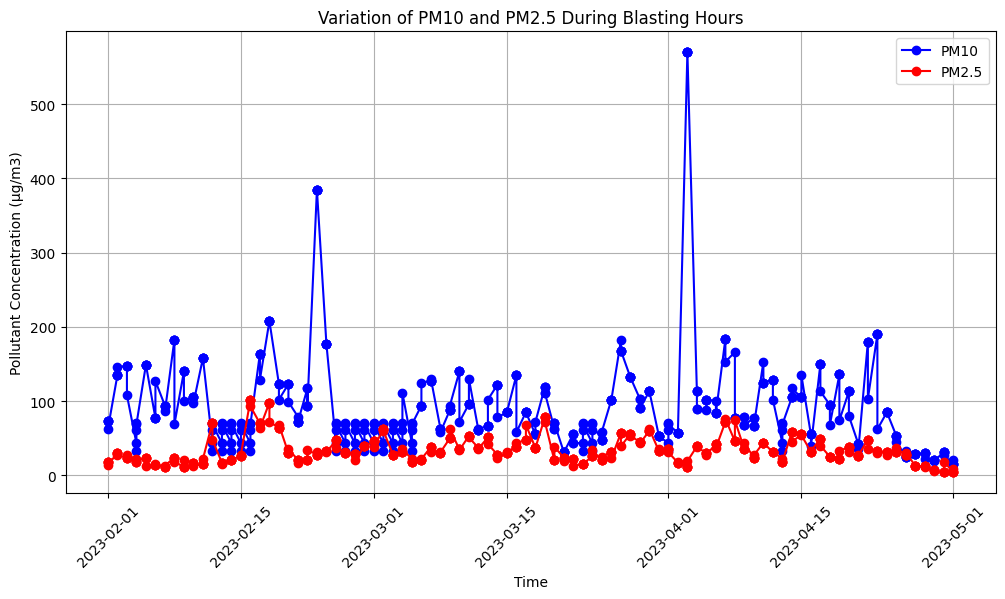

In [54]:
# Plot line charts for PM10 and PM2.5 variations over time
plt.figure(figsize=(12, 6))
plt.plot(blasting_hours_data['Date'], blasting_hours_data['PM10 (µg/m3)'], marker='o', linestyle='-', color='blue', label='PM10')
plt.plot(blasting_hours_data['Date'], blasting_hours_data['PM2.5 (µg/m3)'], marker='o', linestyle='-', color='red', label='PM2.5')
plt.title('Variation of PM10 and PM2.5 During Blasting Hours')
plt.xlabel('Time')
plt.ylabel('Pollutant Concentration (µg/m3)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [55]:
# Calculate standard deviation and range for PM10 and PM2.5
std_pm10 = blasting_hours_data['PM10 (µg/m3)'].std()
range_pm10 = blasting_hours_data['PM10 (µg/m3)'].max() - blasting_hours_data['PM10 (µg/m3)'].min()

std_pm25 = blasting_hours_data['PM2.5 (µg/m3)'].std()
range_pm25 = blasting_hours_data['PM2.5 (µg/m3)'].max() - blasting_hours_data['PM2.5 (µg/m3)'].min()

print(f"PM10: Standard Deviation={std_pm10}, Range={range_pm10}")
print(f"PM2.5: Standard Deviation={std_pm25}, Range={range_pm25}")

PM10: Standard Deviation=73.50702671555791, Range=555.0
PM2.5: Standard Deviation=18.55156021137396, Range=98.0


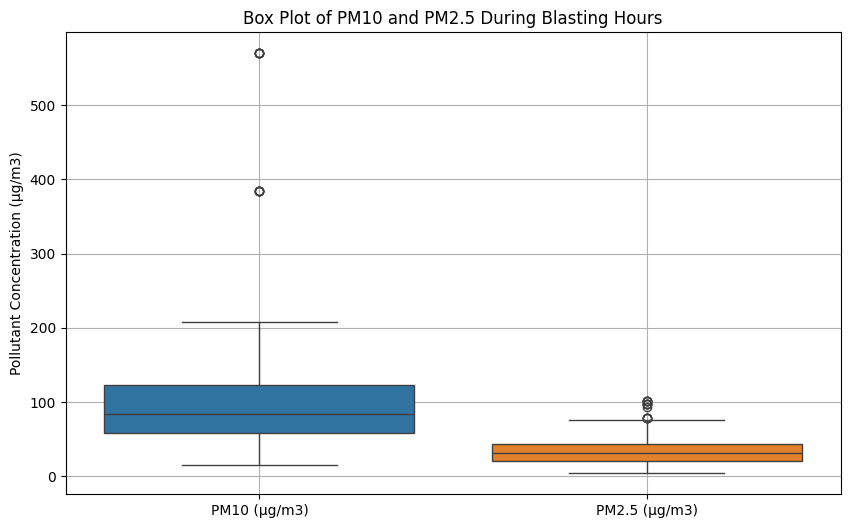

In [56]:
# Plot box plots for PM10 and PM2.5
plt.figure(figsize=(10, 6))
sns.boxplot(data=blasting_hours_data[['PM10 (µg/m3)', 'PM2.5 (µg/m3)']], orient='v')
plt.title('Box Plot of PM10 and PM2.5 During Blasting Hours')
plt.ylabel('Pollutant Concentration (µg/m3)')
plt.grid(True)
plt.show()

In [57]:
# Calculate percentile ranks for PM10 and PM2.5
percentiles = [25, 50, 75]
pm10_percentiles = np.percentile(blasting_hours_data['PM10 (µg/m3)'].dropna(), percentiles)
pm25_percentiles = np.percentile(blasting_hours_data['PM2.5 (µg/m3)'].dropna(), percentiles)

print(f"PM10 Percentiles (25th, 50th, 75th): {pm10_percentiles}")
print(f"PM2.5 Percentiles (25th, 50th, 75th): {pm25_percentiles}")

PM10 Percentiles (25th, 50th, 75th): [ 58.25  84.   123.  ]
PM2.5 Percentiles (25th, 50th, 75th): [21.   31.   43.75]


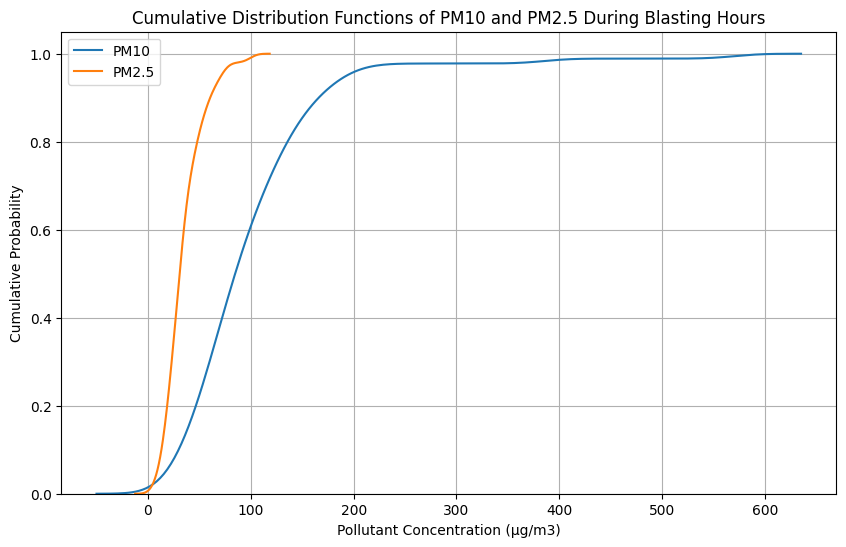

In [58]:
# Plot CDFs for PM10 and PM2.5
plt.figure(figsize=(10, 6))
sns.kdeplot(blasting_hours_data['PM10 (µg/m3)'], cumulative=True, label='PM10')
sns.kdeplot(blasting_hours_data['PM2.5 (µg/m3)'], cumulative=True, label='PM2.5')
plt.title('Cumulative Distribution Functions of PM10 and PM2.5 During Blasting Hours')
plt.xlabel('Pollutant Concentration (µg/m3)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
# Calculate correlations between pollutants
correlation_matrix = blasting_hours_data[['PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)', 'NO2 (µg/m3)', 'SO2 (µg/m3)']].corr()

print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3),NO2 (µg/m3),SO2 (µg/m3)
PM10 (µg/m3),1.000000,0.117326,0.030315,-0.098581,0.076367
PM2.5 (µg/m3),0.117326,1.000000,0.294854,0.231715,0.589507
NO (µg/m3),0.030315,0.294854,1.000000,0.540347,0.731567
NO2 (µg/m3),-0.098581,0.231715,0.540347,1.000000,0.592200
SO2 (µg/m3),0.076367,0.589507,0.731567,0.592200,1.000000


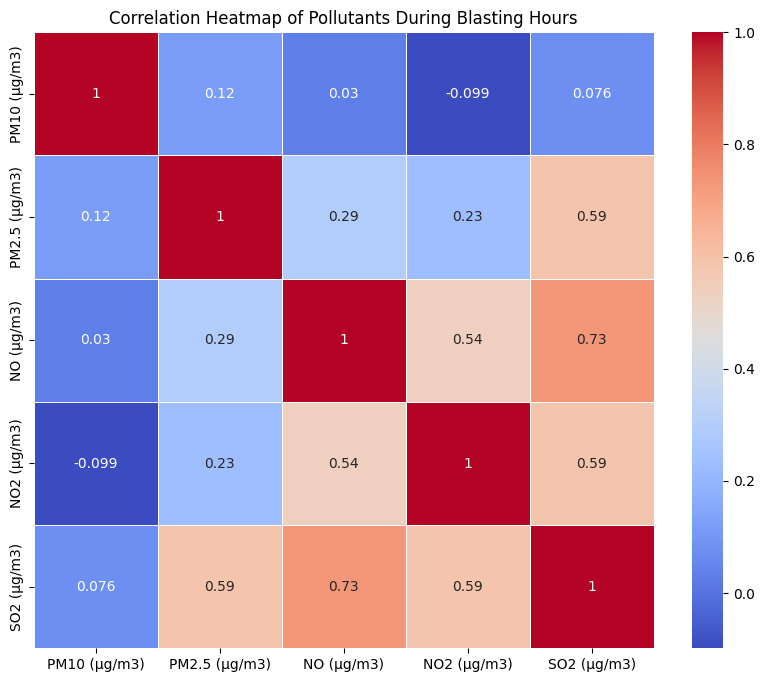

In [60]:
# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Pollutants During Blasting Hours')
plt.show()


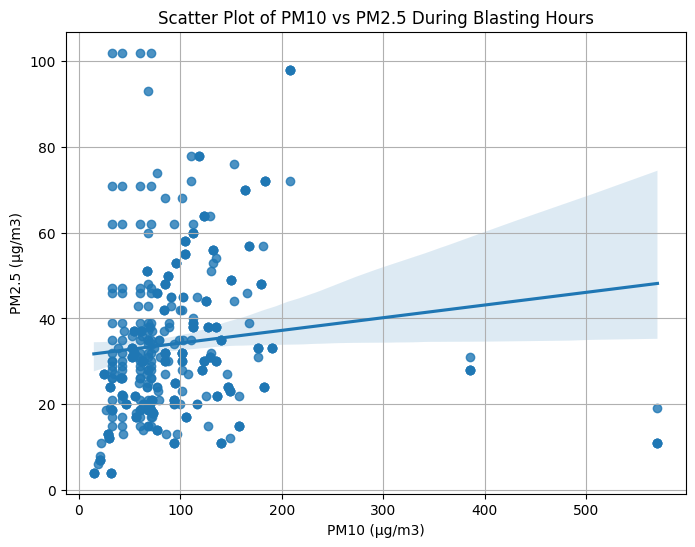

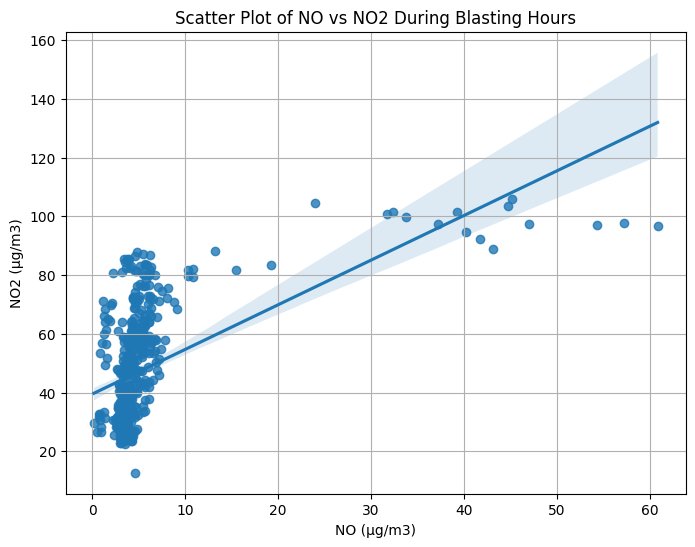

In [61]:
# Scatter plot with regression line for PM10 vs PM2.5
plt.figure(figsize=(8, 6))
sns.regplot(x='PM10 (µg/m3)', y='PM2.5 (µg/m3)', data=blasting_hours_data)
plt.title('Scatter Plot of PM10 vs PM2.5 During Blasting Hours')
plt.xlabel('PM10 (µg/m3)')
plt.ylabel('PM2.5 (µg/m3)')
plt.grid(True)
plt.show()

# Scatter plot with regression line for NO vs NO2
plt.figure(figsize=(8, 6))
sns.regplot(x='NO (µg/m3)', y='NO2 (µg/m3)', data=blasting_hours_data)
plt.title('Scatter Plot of NO vs NO2 During Blasting Hours')
plt.xlabel('NO (µg/m3)')
plt.ylabel('NO2 (µg/m3)')
plt.grid(True)
plt.show()

In [62]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

                            AutoReg Model Results                             
Dep. Variable:           PM10 (µg/m3)   No. Observations:                 6912
Model:                     AutoReg(1)   Log Likelihood              -36287.708
Method:               Conditional MLE   S.D. of innovations             46.145
Date:                Sun, 07 Jul 2024   AIC                          72581.415
Time:                        11:25:05   BIC                          72601.938
Sample:                             1   HQIC                         72588.491
                                 6912                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.9716      0.937     12.774      0.000      10.135      13.808
PM10 (µg/m3).L1     0.9301      0.004    210.433      0.000       0.921       0.939
                                

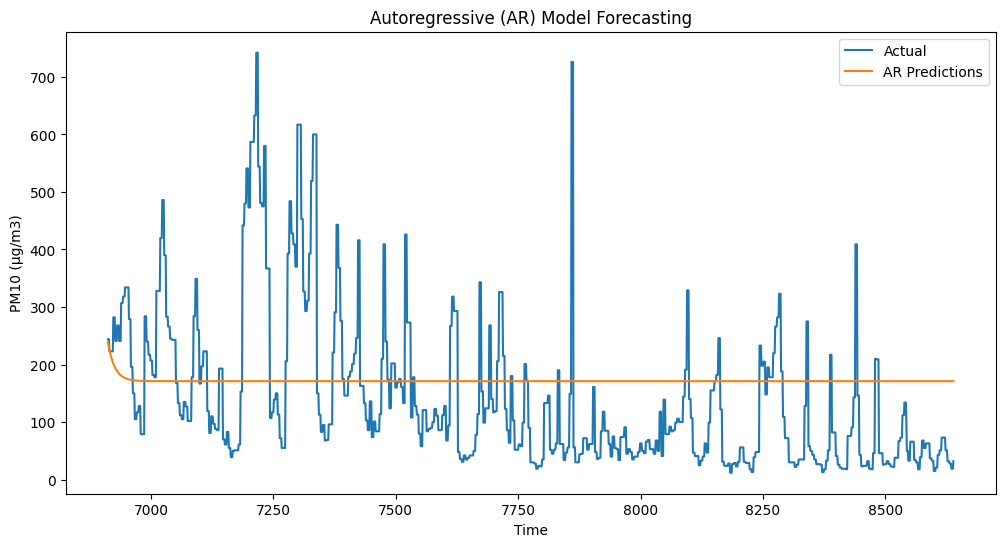

In [63]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error


pollutant = 'PM10 (µg/m3)'
pm10_data = df[pollutant]

# Split data into train and test sets
train_size = int(len(pm10_data) * 0.8)
train, test = pm10_data[:train_size], pm10_data[train_size:]

# Autoregression (AR) model
ar_model = AutoReg(train, lags=1)  # lags=1 means using the previous value as predictor
ar_model_fit = ar_model.fit()

# Print summary of the model
print(ar_model_fit.summary())

# Make predictions
ar_predictions = ar_model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Evaluate AR model
ar_rmse = np.sqrt(mean_squared_error(test, ar_predictions))
ar_mae = mean_absolute_error(test, ar_predictions)
print(f"AR Model RMSE: {ar_rmse}")
print(f"AR Model MAE: {ar_mae}")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, ar_predictions, label='AR Predictions')
plt.title('Autoregressive (AR) Model Forecasting')
plt.xlabel('Time')
plt.ylabel(pollutant)
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:           PM10 (µg/m3)   No. Observations:                 6912
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -36293.642
Date:                Sun, 07 Jul 2024   AIC                          72593.285
Time:                        11:25:06   BIC                          72613.808
Sample:                             0   HQIC                         72600.361
                               - 6912                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        170.8539     11.432     14.946      0.000     148.448     193.260
ar.L1          0.9300      0.004    260.015      0.000       0.923       0.937
sigma2      2129.3101     10.294    206.853      0.0

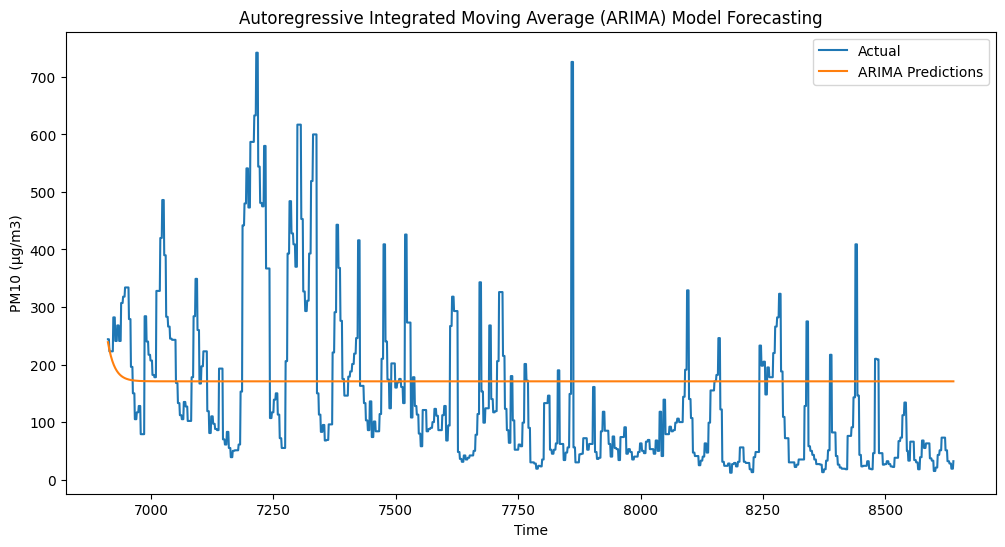

In [64]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train, order=(1, 0, 0))
arima_model_fit = arima_model.fit()

# Print summary of the model
print(arima_model_fit.summary())

# Make ARIMA predictions
arima_predictions = arima_model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Evaluate ARIMA model
arima_rmse = np.sqrt(mean_squared_error(test, arima_predictions))
arima_mae = mean_absolute_error(test, arima_predictions)
print(f"ARIMA Model RMSE: {arima_rmse}")
print(f"ARIMA Model MAE: {arima_mae}")

# Plot actual vs. predicted values for ARIMA
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, arima_predictions, label='ARIMA Predictions')
plt.title('Autoregressive Integrated Moving Average (ARIMA) Model Forecasting')
plt.xlabel('Time')
plt.ylabel(pollutant)
plt.legend()
plt.show()


In [65]:
# Fill missing values using linear interpolation
df_interpolated = df.interpolate(method='linear')

# Verify that there are no more missing values
print(df_interpolated.isnull().sum())

Unnamed: 0         0
PM10 (µg/m3)       0
Time               0
Date               0
NO (µg/m3)         0
PM2.5 (µg/m3)      0
NO2 (µg/m3)        0
NOX (ppb)          0
CO (mg/m3)         0
SO2 (µg/m3)        0
NH3 (µg/m3)        0
Ozone (µg/m3)      0
Benzene (µg/m3)    0
dtype: int64


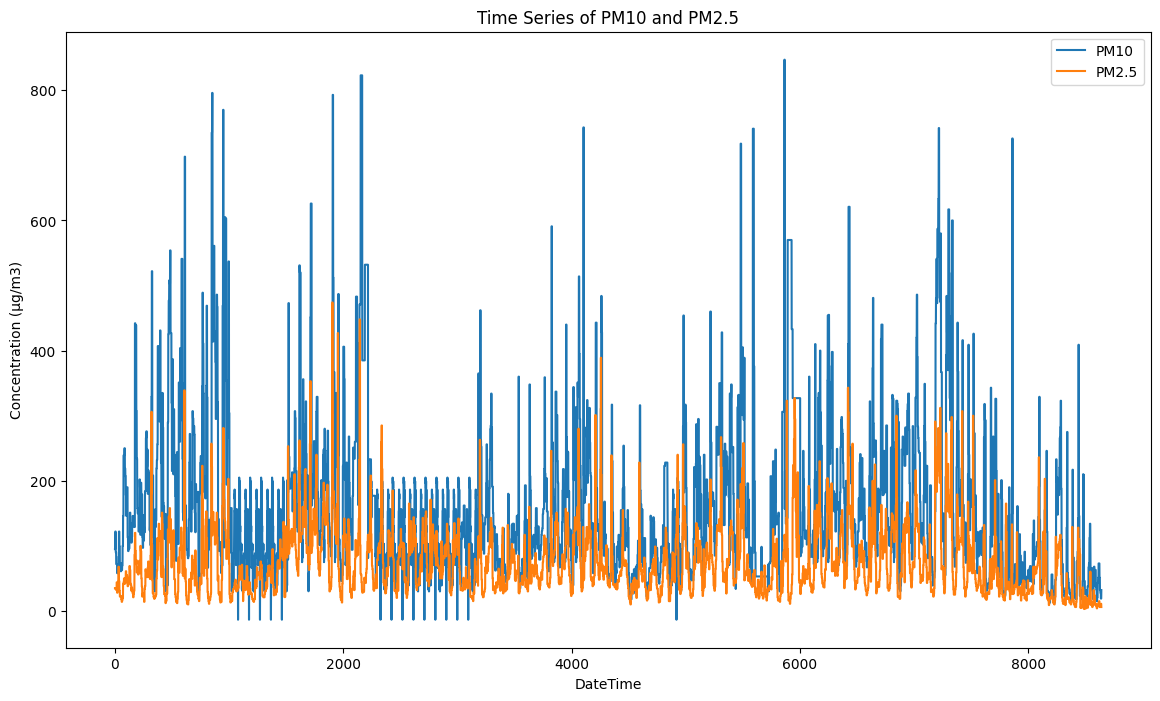

In [66]:
import matplotlib.pyplot as plt

# Plot time series for major pollutants
plt.figure(figsize=(14, 8))
plt.plot(df_interpolated.index, df_interpolated['PM10 (µg/m3)'], label='PM10')
plt.plot(df_interpolated.index, df_interpolated['PM2.5 (µg/m3)'], label='PM2.5')
plt.xlabel('DateTime')
plt.ylabel('Concentration (µg/m3)')
plt.title('Time Series of PM10 and PM2.5')
plt.legend()
plt.show()

In [67]:
# Summary statistics
summary_stats = df_interpolated.describe()
summary_stats

,Unnamed: 0,PM10 (µg/m3),Date,NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
count,8640.000000,8640.000000,8640,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000
mean,4319.500000,165.140621,2023-03-17 12:00:00,14.269630,74.626459,56.128353,42.457154,1.392857,33.727472,13.160495,35.765681,0.177505
min,0.000000,-13.488183,2023-02-01 00:00:00,0.100000,3.000000,0.200000,4.200000,0.100000,0.100000,4.600000,0.100000,0.100000
25%,2159.750000,79.000000,2023-02-23 00:00:00,4.000000,36.000000,39.575000,25.100000,0.930000,15.000000,9.400000,11.000000,0.177505
50%,4319.500000,127.000000,2023-03-17 12:00:00,6.600000,59.000000,53.800000,37.500000,1.390000,24.200000,11.000000,33.000000,0.177505
75%,6479.250000,208.000000,2023-04-09 00:00:00,17.121285,100.000000,71.500000,53.300000,1.832500,36.100000,13.900000,58.125000,0.177505
max,8639.000000,847.000000,2023-05-01 00:00:00,157.500000,474.000000,106.900000,165.200000,4.000000,645.600000,62.400000,123.800000,0.600000
std,2494.297496,128.089107,NaN,17.986445,54.992383,20.328553,22.129798,0.626985,38.878154,6.095797,26.549469,0.052601


In [68]:
url = "https://github.com/FuTSA23/time-series-analysis-datasets/raw/main/Complete_Blasting_info%20(1).csv"
df = pd.read_csv(url)
# Combine Date and Time into a single DateTime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Set the DateTime column as the index
df.set_index('DateTime', inplace=True)

# Define the intervention period
blasting_start = pd.Timestamp('2023-02-01 13:45:00')
blasting_end = pd.Timestamp('2023-05-01 14:45:00')

# Extract data around blasting events
pre_intervention_period = df[df.index < blasting_start]
post_intervention_period = df[(df.index >= blasting_start) & (df.index <= blasting_end)]


In [69]:
# Display the length and first few rows of the pre- and post-intervention periods
print(f"Length of pre-intervention period: {len(pre_intervention_period)}")
print("First few rows of pre-intervention period:")
pre_intervention_period.head()



Length of pre-intervention period: 55
First few rows of pre-intervention period:


,Unnamed: 0,PM10 (µg/m3),Time,Date,NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
DateTime,,,,,,,,,,,,,
2023-02-01 00:00:00,0,95.0,00:00:00,2023-02-01,14.484070,35.0,90.1,56.2,0.31,11.986833,17.7,28.1,0.4
2023-02-01 00:15:00,1,95.0,00:15:00,2023-02-01,14.484070,35.0,88.0,55.1,0.33,11.986833,18.3,27.1,0.4
2023-02-01 00:30:00,2,95.0,00:30:00,2023-02-01,15.835914,35.0,87.7,55.2,0.38,10.912796,19.7,24.9,0.4
2023-02-01 00:45:00,3,122.0,00:45:00,2023-02-01,15.914518,34.0,88.9,55.7,0.38,10.613291,21.3,21.9,0.4
2023-02-01 01:00:00,4,122.0,01:00:00,2023-02-01,16.035640,34.0,90.0,55.8,0.38,7.362361,22.3,16.7,0.4


In [70]:
print(f"Length of post-intervention period: {len(post_intervention_period)}")
print("First few rows of post-intervention period:")
post_intervention_period.head()

Length of post-intervention period: 8549
First few rows of post-intervention period:


,Unnamed: 0,PM10 (µg/m3),Time,Date,NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
DateTime,,,,,,,,,,,,,
2023-02-01 13:45:00,55,73.0,13:45:00,2023-02-01,4.647741,18.0,59.9,34.8,0.31,49.421488,20.5,56.9,0.1
2023-02-01 14:00:00,56,73.0,14:00:00,2023-02-01,4.854775,18.0,62.4,36.2,0.30,53.211752,20.7,56.8,0.1
2023-02-01 14:15:00,57,73.0,14:15:00,2023-02-01,5.469984,18.0,61.1,35.0,0.31,36.971376,21.5,57.1,0.1
2023-02-01 14:30:00,58,73.0,14:30:00,2023-02-01,5.736887,18.0,59.0,34.0,0.34,29.556898,22.0,55.0,0.1
2023-02-01 14:45:00,59,63.0,14:45:00,2023-02-01,6.123021,14.0,59.2,34.0,0.38,27.448166,20.8,56.3,0.1


In [71]:
# Calculate mean levels of pollutants
pre_mean_PM10 = pre_intervention_period['PM10 (µg/m3)'].mean()
post_mean_PM10 = post_intervention_period['PM10 (µg/m3)'].mean()

pre_mean_PM25 = pre_intervention_period['PM2.5 (µg/m3)'].mean()
post_mean_PM25 = post_intervention_period['PM2.5 (µg/m3)'].mean()

print(f"Pre-Intervention Mean PM10: {pre_mean_PM10:.2f}")
print(f"Post-Intervention Mean PM10: {post_mean_PM10:.2f}")

print(f"Pre-Intervention Mean PM2.5: {pre_mean_PM25:.2f}")
print(f"Post-Intervention Mean PM2.5: {post_mean_PM25:.2f}")

Pre-Intervention Mean PM10: 80.24
Post-Intervention Mean PM10: 166.20
Pre-Intervention Mean PM2.5: 35.65
Post-Intervention Mean PM2.5: 75.15


In [72]:
from scipy.stats import ttest_ind, wilcoxon

# Conduct t-test
t_stat, p_val = ttest_ind(pre_intervention_period['PM10 (µg/m3)'], post_intervention_period['PM10 (µg/m3)'], nan_policy='omit')
print(f"T-test for PM10: t-statistic = {t_stat:.2f}, p-value = {p_val:.2e}")

t_stat, p_val = ttest_ind(pre_intervention_period['PM2.5 (µg/m3)'], post_intervention_period['PM2.5 (µg/m3)'], nan_policy='omit')
print(f"T-test for PM2.5: t-statistic = {t_stat:.2f}, p-value = {p_val:.2e}")

T-test for PM10: t-statistic = -4.97, p-value = 6.92e-07
T-test for PM2.5: t-statistic = -5.32, p-value = 1.05e-07


In [73]:

url = "https://github.com/FuTSA23/time-series-analysis-datasets/raw/main/Complete_Blasting_info%20(1).csv"
df = pd.read_csv(url)

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)

df.drop(columns=['Date', 'Time', 'Unnamed: 0'], inplace=True)

# Interpolate missing values
df_interpolated = df.interpolate(method='time')

# Define the blasting event time window
blasting_start = pd.Timestamp('2023-02-01 13:45:00')
blasting_end = pd.Timestamp('2023-05-01 14:45:00')

# Ensure index is in datetime format
if not pd.api.types.is_datetime64_any_dtype(df_interpolated.index):
    df_interpolated.index = pd.to_datetime(df_interpolated.index)

# Define time windows around blasting event
pre_window = df_interpolated[df_interpolated.index < blasting_start]
post_window = df_interpolated[(df_interpolated.index >= blasting_start) & (df_interpolated.index <= blasting_end)]

# Aggregate pollutant measurements within each time window (only for numeric columns)
numeric_columns = df_interpolated.select_dtypes(include='number').columns
pre_window_mean = pre_window[numeric_columns].mean()
post_window_mean = post_window[numeric_columns].mean()

print("Pre-Blasting Window Mean Values:")
pre_window_mean




Pre-Blasting Window Mean Values:


PM10 (µg/m3)       80.236364
NO (µg/m3)         17.048893
PM2.5 (µg/m3)      35.654545
NO2 (µg/m3)        79.232547
NOX (ppb)          48.706586
CO (mg/m3)          0.372480
SO2 (µg/m3)        24.776816
NH3 (µg/m3)        21.207756
Ozone (µg/m3)      31.977599
Benzene (µg/m3)     0.330909
dtype: float64

In [74]:
print("\nPost-Blasting Window Mean Values:")
post_window_mean


Post-Blasting Window Mean Values:


PM10 (µg/m3)       166.198031
NO (µg/m3)          14.263530
PM2.5 (µg/m3)       75.151434
NO2 (µg/m3)         55.815474
NOX (ppb)           42.343379
CO (mg/m3)           1.402477
SO2 (µg/m3)         33.847173
NH3 (µg/m3)         13.124032
Ozone (µg/m3)       35.816799
Benzene (µg/m3)      0.176845
dtype: float64

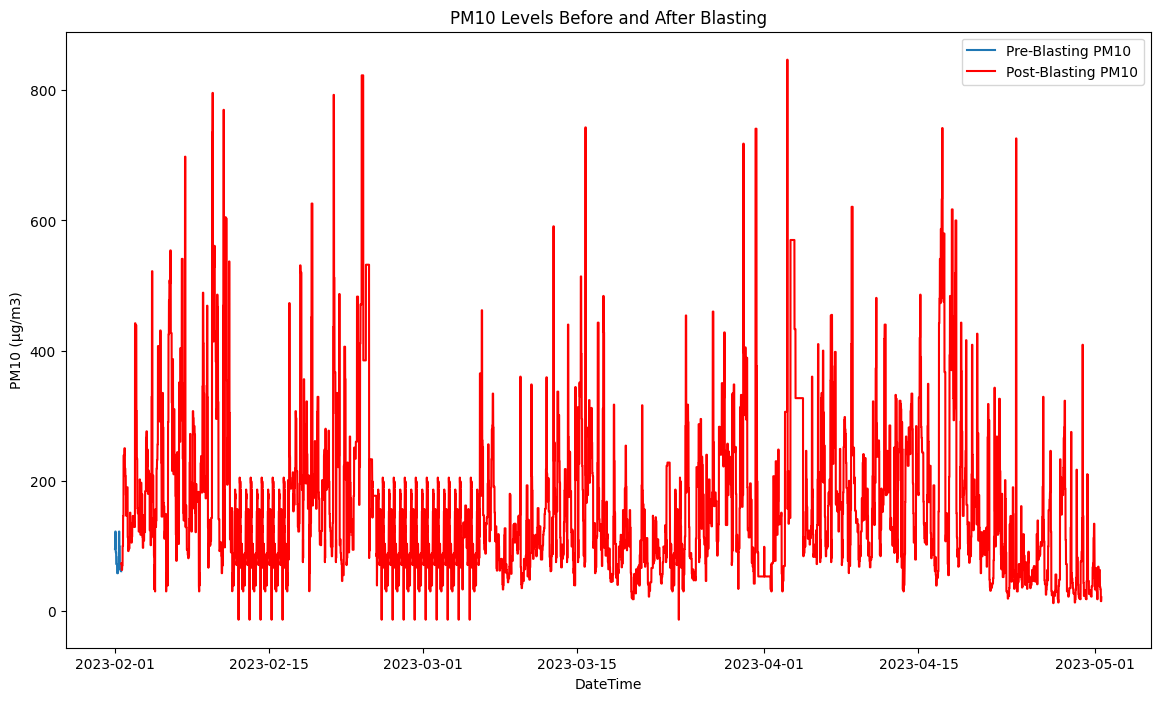

In [75]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pre_window.index, pre_window['PM10 (µg/m3)'], label='Pre-Blasting PM10')
ax.plot(post_window.index, post_window['PM10 (µg/m3)'], label='Post-Blasting PM10', color='red')
ax.set_xlabel('DateTime')
ax.set_ylabel('PM10 (µg/m3)')
ax.set_title('PM10 Levels Before and After Blasting')
ax.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


ARIMA RMSE: 20.11


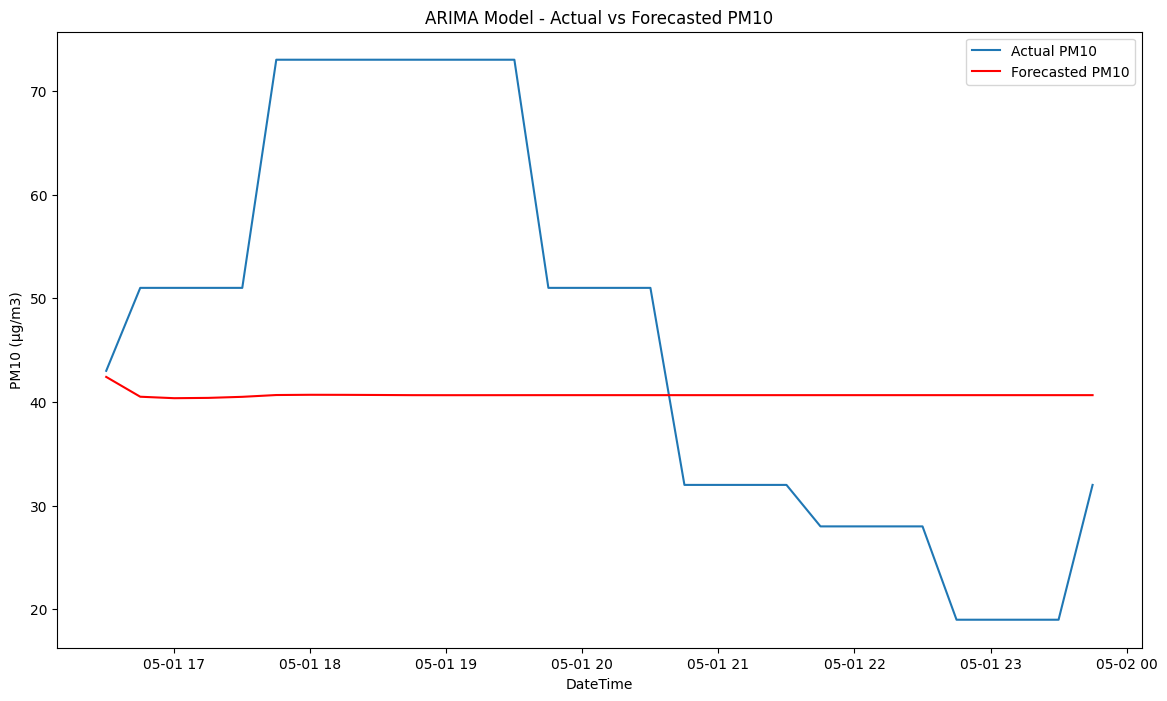

In [76]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
train = df_interpolated['PM10 (µg/m3)'][:-30]
test = df_interpolated['PM10 (µg/m3)'][-30:]

# Fit ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Generate forecasts
forecast_steps = len(test)
arima_forecast = arima_model_fit.forecast(steps=forecast_steps)

# Evaluate ARIMA model
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f"ARIMA RMSE: {arima_rmse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(14, 8))
plt.plot(test.index, test, label='Actual PM10')
plt.plot(test.index, arima_forecast, label='Forecasted PM10', color='red')
plt.xlabel('DateTime')
plt.ylabel('PM10 (µg/m3)')
plt.title('ARIMA Model - Actual vs Forecasted PM10')
plt.legend()
plt.show()

<ipython-input-77-a39096ec7ffb>:9: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:966: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


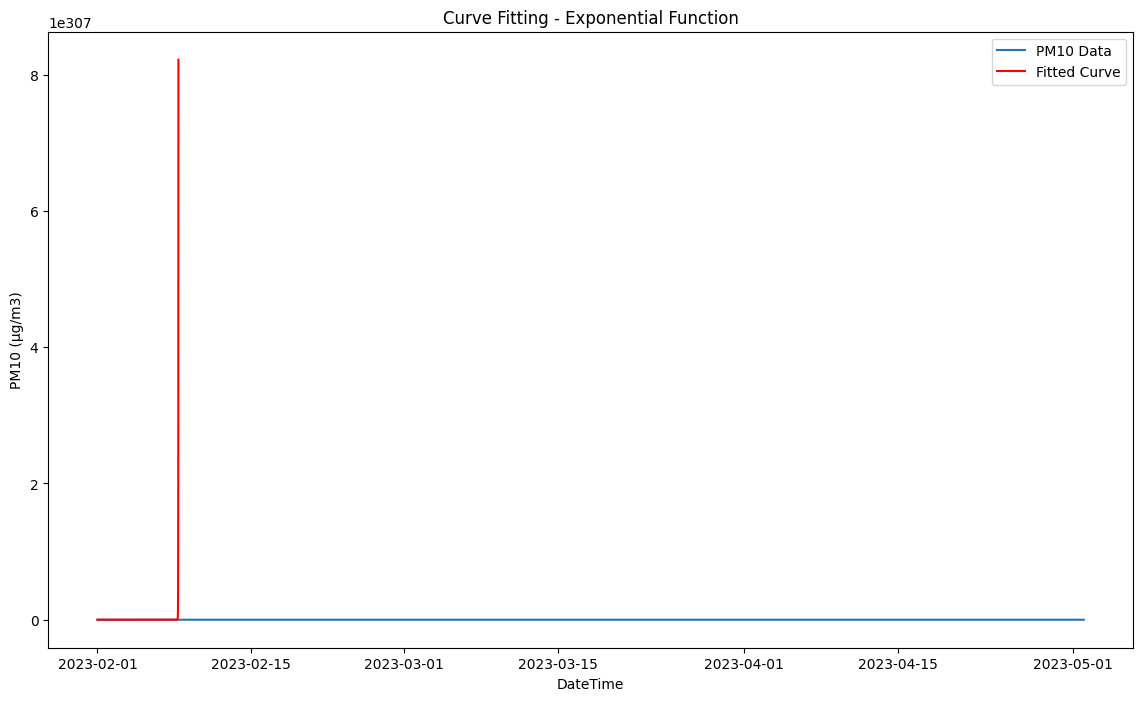

In [77]:
# Example: Classification
# Using a simple classification approach to label data as pre-blasting or post-blasting
df_interpolated['Blasting'] = ['Pre' if time < blasting_start else 'Post' for time in df_interpolated.index]

# Example: Curve fitting
from scipy.optimize import curve_fit

def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Fit curve to PM10 data
x_data = np.arange(len(df_interpolated))
y_data = df_interpolated['PM10 (µg/m3)']
popt, pcov = curve_fit(exponential_func, x_data, y_data)

# Plot curve fitting result
plt.figure(figsize=(14, 8))
plt.plot(df_interpolated.index, y_data, label='PM10 Data')
plt.plot(df_interpolated.index, exponential_func(x_data, *popt), label='Fitted Curve', color='red')
plt.xlabel('DateTime')
plt.ylabel('PM10 (µg/m3)')
plt.title('Curve Fitting - Exponential Function')
plt.legend()
plt.show()

       PM10 (µg/m3)   NO (µg/m3)  PM2.5 (µg/m3)  NO2 (µg/m3)    NOX (ppb)  \
count   8640.000000  8640.000000    8640.000000  8640.000000  8640.000000   
mean     165.140621    14.269630      74.626459    56.128353    42.457154   
std      128.089107    17.986445      54.992383    20.328553    22.129798   
min      -13.488183     0.100000       3.000000     0.200000     4.200000   
25%       79.000000     4.000000      36.000000    39.575000    25.100000   
50%      127.000000     6.600000      59.000000    53.800000    37.500000   
75%      208.000000    17.121285     100.000000    71.500000    53.300000   
max      847.000000   157.500000     474.000000   106.900000   165.200000   

        CO (mg/m3)  SO2 (µg/m3)  NH3 (µg/m3)  Ozone (µg/m3)  Benzene (µg/m3)  
count  8640.000000  8640.000000  8640.000000    8640.000000      8640.000000  
mean      1.392857    33.727472    13.160495      35.765681         0.177505  
std       0.626985    38.878154     6.095797      26.549469         0

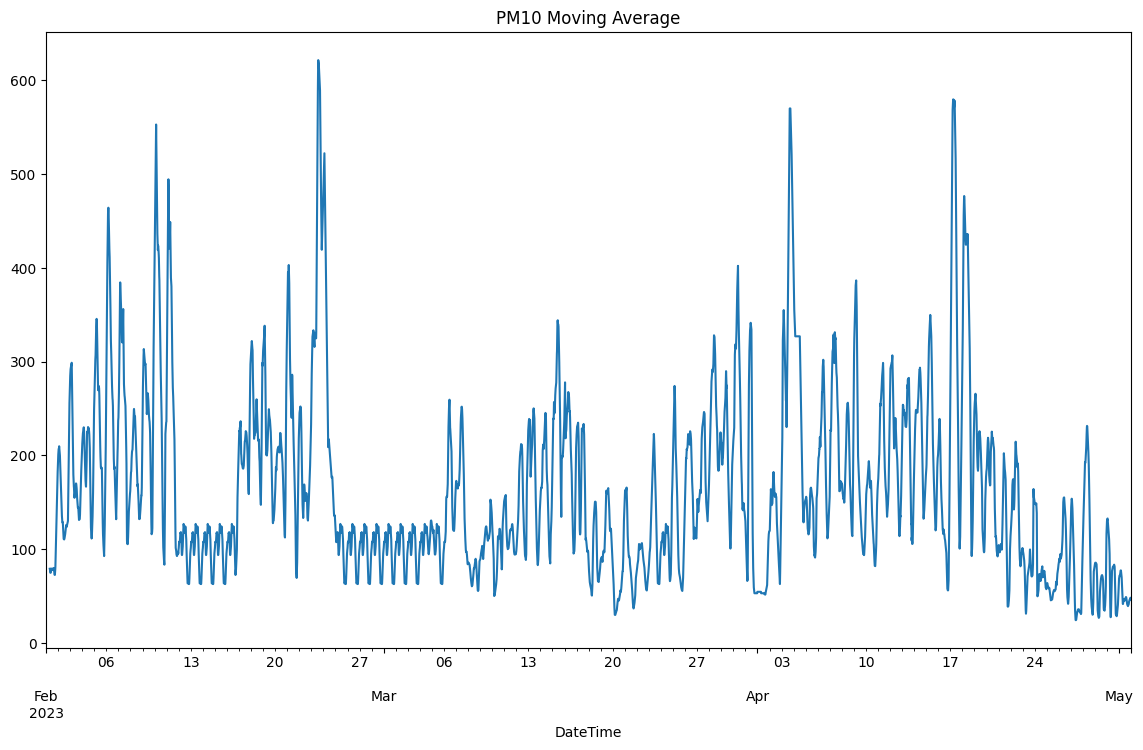

In [78]:
# Descriptive statistics
descriptive_stats = df_interpolated.describe()
print(descriptive_stats)

# Identify trends and seasonal variations
df_interpolated['PM10 (µg/m3)'].rolling(window=30).mean().plot(figsize=(14, 8), title='PM10 Moving Average')
plt.show()